In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, cross_validate

<p>Read the dataset and drop the top genre column because it is the same as the target</p>

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/spotify top tracks/tracks_with_binary_target.csv')
data.drop(['top genre'], axis=1, inplace=True)
data.head()

,title,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity,is_dance_pop
0,"Hey, Soul Sister",Train,3.618665,78.0,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83,0
1,Love The Way You Lie,Eminem,42.795820,95.0,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82,0
2,TiK ToK,Kesha,6.235482,82.0,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80,1
3,Bad Romance,Lady Gaga,16.716518,90.0,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79,1
4,Just the Way You Are,Bruno Mars,29.381079,93.0,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78,0


In [ ]:
features = data.columns.drop(['is_dance_pop'])
labels = ['is_dance_pop']

In [ ]:
X = data[features]
Y = data[labels]

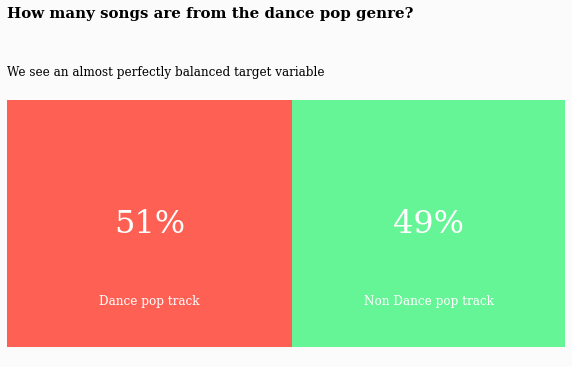

In [ ]:
x=data.groupby(['is_dance_pop'])['is_dance_pop'].count()
y=len(data)
r=((x/y)).round(2)

ratio = pd.DataFrame(r).T

fig, ax = plt.subplots(1,1,figsize=(10, 5))
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], 
        color='#ff4f42', alpha=0.9, label='Dance pop track')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], 
        color='#56f58b', alpha=0.9, label='Non Dance pop track')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", 
                   xy=(ratio[1.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Dance pop track", 
                   xy=(ratio[1.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),
                   va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("Non Dance pop track", 
                   xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.125,1.075,'How many songs are from the dance pop genre?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an almost perfectly balanced target variable',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.legend().set_visible(False)
plt.show()

<p>Encoding categorical features</p>

In [ ]:
encoder =  LabelEncoder()
X['artist'] = encoder.fit_transform(X['artist'])
X['title'] = encoder.fit_transform(X['title'])
X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,title,artist,followers,artist_popularity,year,tempo,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,track_popularity
0,214,200,3.618665,78.0,2010,97.0,89.0,67.0,-4.0,8.0,80.0,217.0,19.0,4.0,83
1,313,58,42.795820,95.0,2010,87.0,93.0,75.0,-5.0,52.0,64.0,263.0,24.0,23.0,82
2,536,103,6.235482,82.0,2010,120.0,84.0,76.0,-3.0,29.0,71.0,200.0,10.0,14.0,80
3,41,108,16.716518,90.0,2010,119.0,92.0,70.0,-4.0,8.0,71.0,295.0,0.0,4.0,79
4,266,26,29.381079,93.0,2010,109.0,84.0,64.0,-5.0,9.0,43.0,221.0,2.0,4.0,78


<h1>1. Decision Tree Classifier</h1>

<h3>1.1 Training with train and test set 80% - 20%</h3>

<p>Scaling the values</p>

In [ ]:
scaler = StandardScaler()
X_train, X_test, Y_train, Y_test =  train_test_split(X, Y, test_size=0.2)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4)
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image  

dot_data = export_graphviz(dt_clf, out_file=None, feature_names=features,
                           class_names = labels[0],
                           filled = True, rounded = True,
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render('spotify_tracks')

'spotify_tracks.pdf'

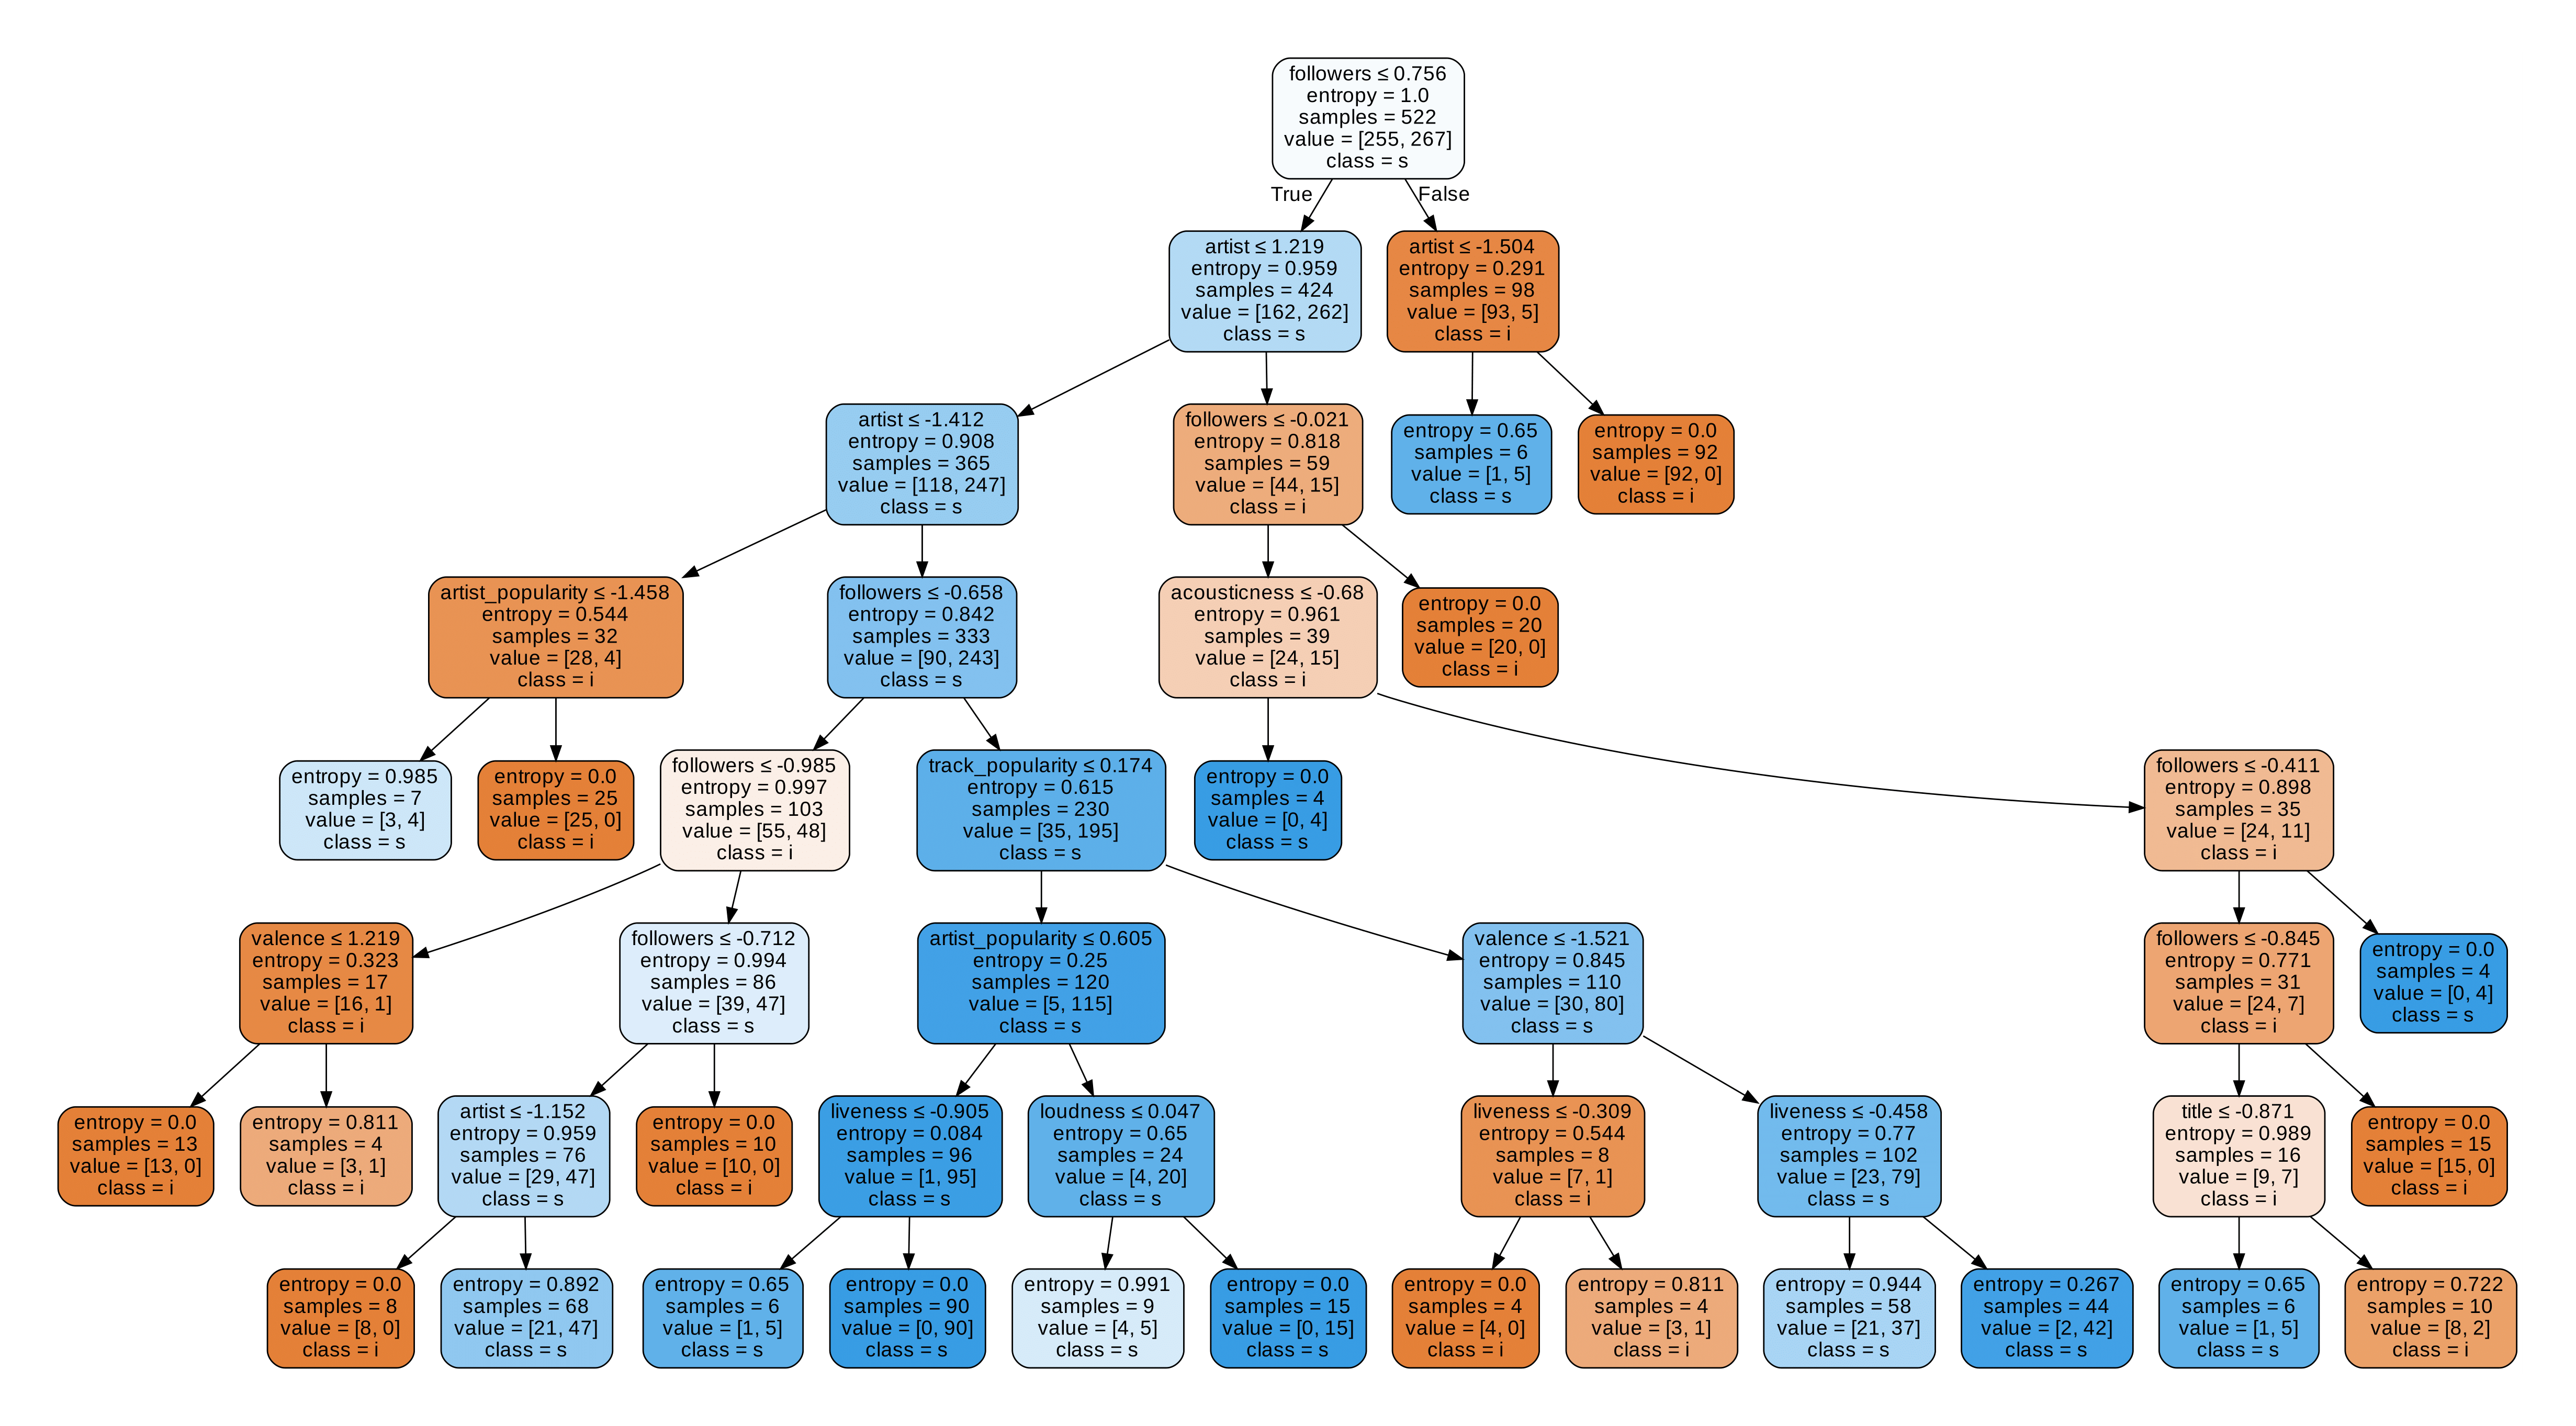

In [ ]:
y_pred = dt_clf.predict(X_test)

In [ ]:
dt_clf.feature_importances_

array([0.01329801, 0.27638417, 0.49039016, 0.04771294, 0.        ,
       0.        , 0.        , 0.        , 0.01890346, 0.04883162,
       0.03490204, 0.        , 0.01713592, 0.        , 0.05244169])

In [ ]:
x_plot = np.arange(1, len(dt_clf.feature_importances_) + 1)

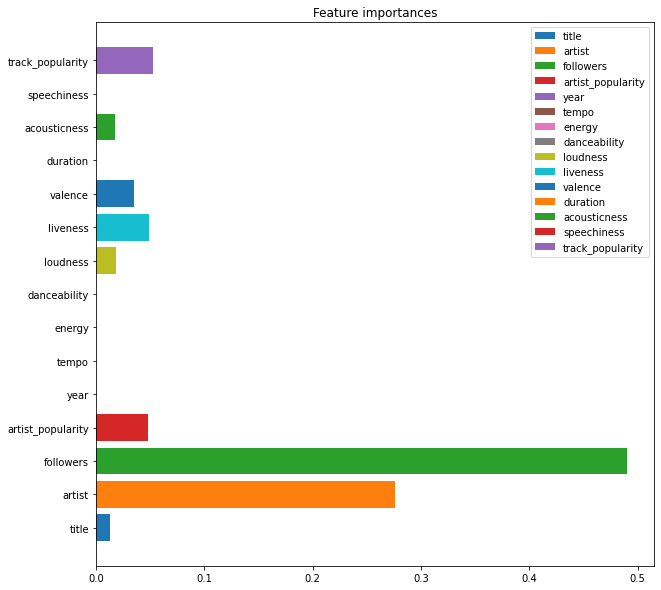

In [ ]:
plt.figure(figsize=(10,10))
for i, feat in enumerate(dt_clf.feature_importances_):
  plt.barh(i+1, feat, label=features.to_list()[i])

plt.yticks(x_plot, features.to_list())
plt.title('Feature importances')
plt.legend()
plt.show()

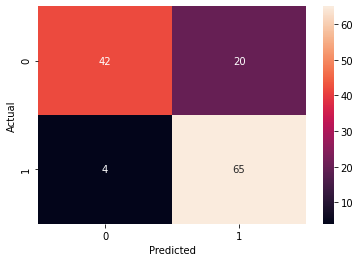

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_score, recall_score, plot_roc_curve

conf_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

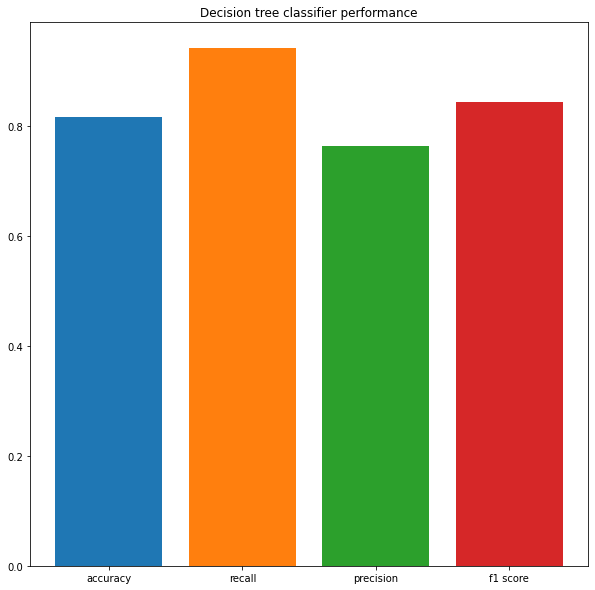

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Decision tree classifier performance')
plt.show()

<Figure size 720x720 with 0 Axes>

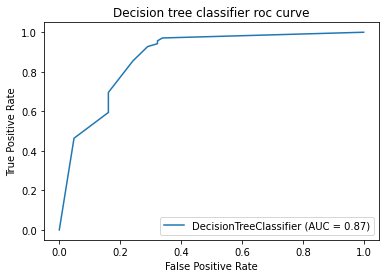

In [ ]:
plt.figure(figsize=(10,10))
plot_roc_curve(dt_clf, X_test, Y_test)
plt.title('Decision tree classifier roc curve')
plt.show()

<h3>1.2 Cross Validaton</h3>

In [ ]:
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=True)

In [ ]:
predicted = []
actual = []

for train_ind, test_ind in folds.split(X):
  X_train = X.iloc[train_ind]
  Y_train = Y.iloc[train_ind]
  X_test = X.iloc[test_ind]
  Y_test = Y.iloc[test_ind]
  scaler.fit(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)
  dt_clf.fit(X_train, Y_train)
  predicted_vals = dt_clf.predict(X_test)
  predicted.extend(predicted_vals)
  actual.extend(Y_test['is_dance_pop'].to_list())

print(predicted)
print(actual)

[0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 

In [ ]:
result = pd.DataFrame({'actual': actual, 'predicted':predicted})
result

,actual,predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
648,0,0
649,0,0
650,1,1
651,1,1


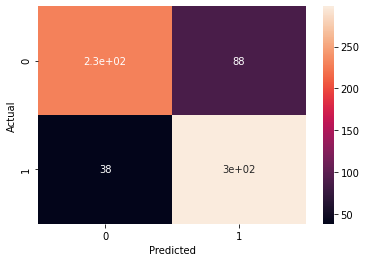

In [ ]:
conf_mat = pd.crosstab(result['actual'], result['predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(actual, predicted)
recall = recall_score(actual, predicted)
precision = precision_score(actual, predicted)
f1 = f1_score(actual, predicted)

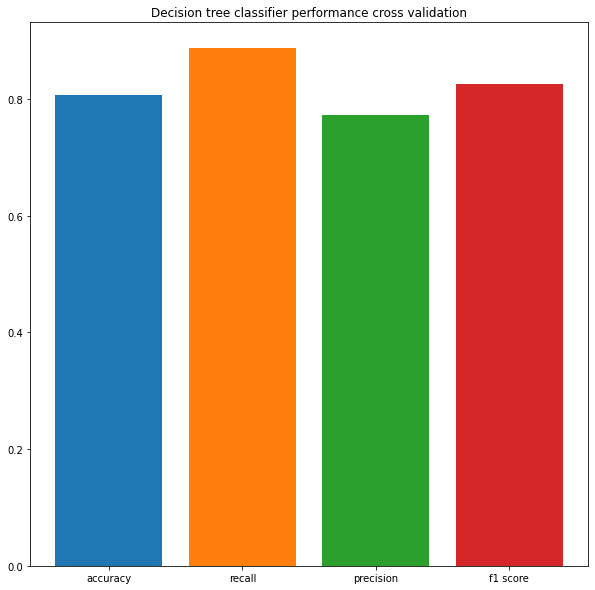

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Decision tree classifier performance cross validation')
plt.show()

<p>Pruning</p>

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
path = dt_clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

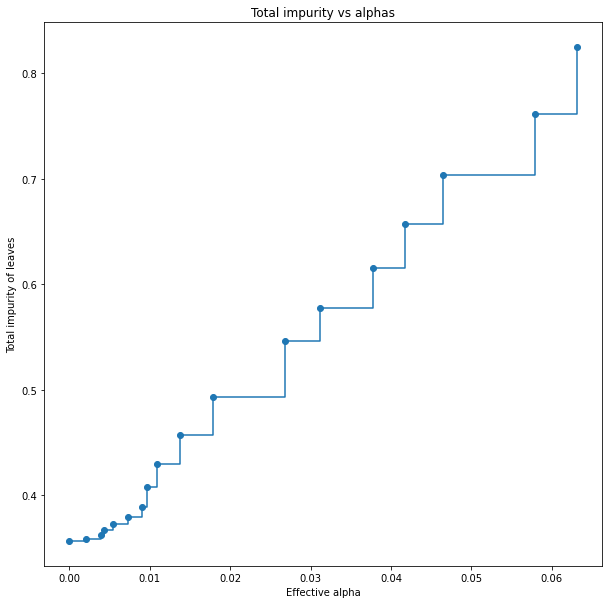

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
plt.xlabel('Effective alpha')
plt.ylabel('Total impurity of leaves')
plt.title('Total impurity vs alphas')
plt.show()

In [ ]:
clfs = []
for alpha in ccp_alphas:
  clf = DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=alpha)
  clf.fit(X_train, Y_train)
  clfs.append(clf)

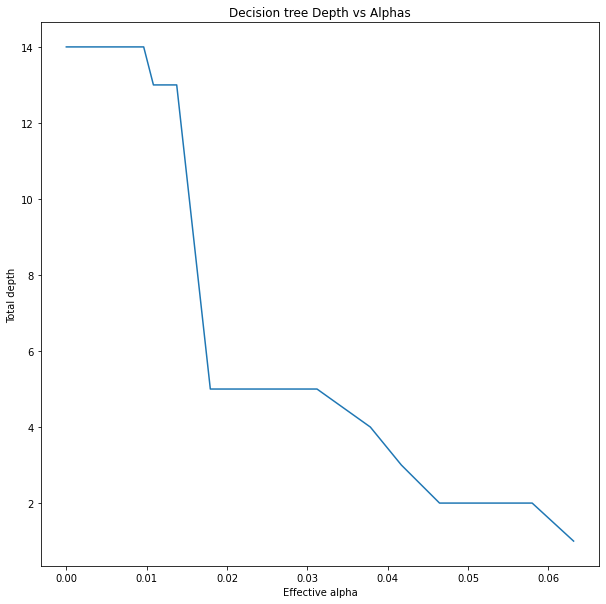

In [ ]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel('Effective alpha')
plt.ylabel('Total depth')
plt.title('Decision tree Depth vs Alphas')
plt.show()

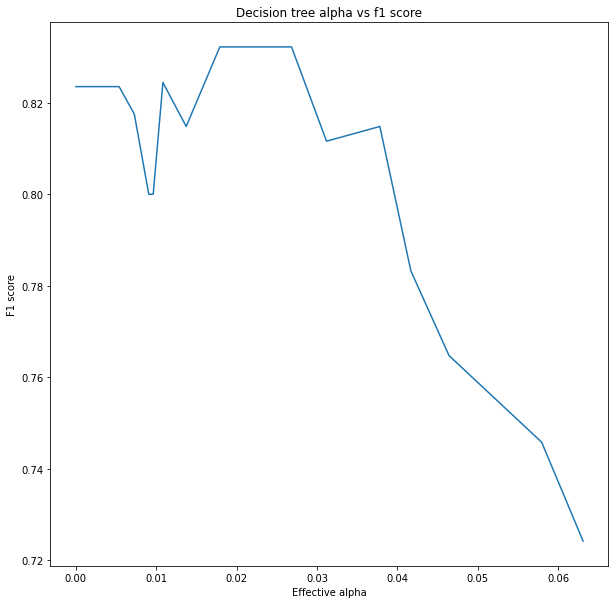

In [ ]:
f1_scores = [f1_score(Y_test, clf.predict(X_test)) for clf in clfs]
plt.figure(figsize=(10,10))
plt.plot(ccp_alphas[:-1], f1_scores[:-1])
plt.xlabel('Effective alpha')
plt.ylabel('F1 score')
plt.title('Decision tree alpha vs f1 score')
plt.show()

In [ ]:
max_score = np.max(f1_scores)
chosen_clf = clfs[0]
for i, score in enumerate(f1_scores):
  if score == max_score:
    chosen_clf = clfs[i]

In [ ]:
y_pred = chosen_clf.predict(X_test)

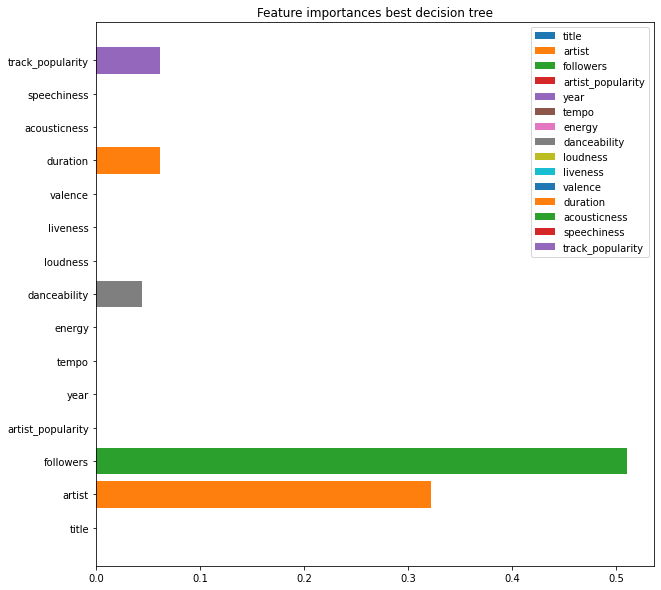

In [ ]:
plt.figure(figsize=(10,10))
for i, feat in enumerate(chosen_clf.feature_importances_):
  plt.barh(i+1, feat, label=features.to_list()[i])

plt.yticks(x_plot, features.to_list())
plt.title('Feature importances best decision tree')
plt.legend()
plt.show()

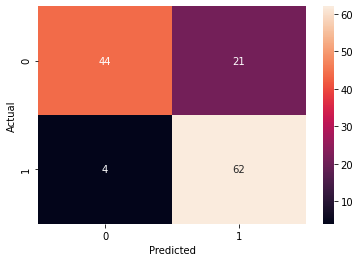

In [ ]:
conf_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

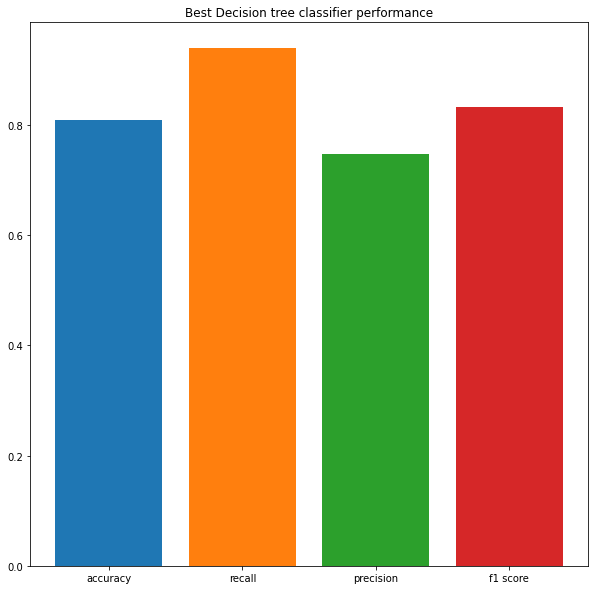

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Best Decision tree classifier performance')
plt.show()

<h1>2. Random Forest</h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=6, min_samples_split=4)
rf_clf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
rf_clf.feature_importances_

array([0.02168786, 0.1426316 , 0.28663555, 0.13051981, 0.0362991 ,
       0.02913402, 0.0245156 , 0.05056591, 0.04843183, 0.03001682,
       0.03314653, 0.03667283, 0.03673195, 0.02320541, 0.06980518])

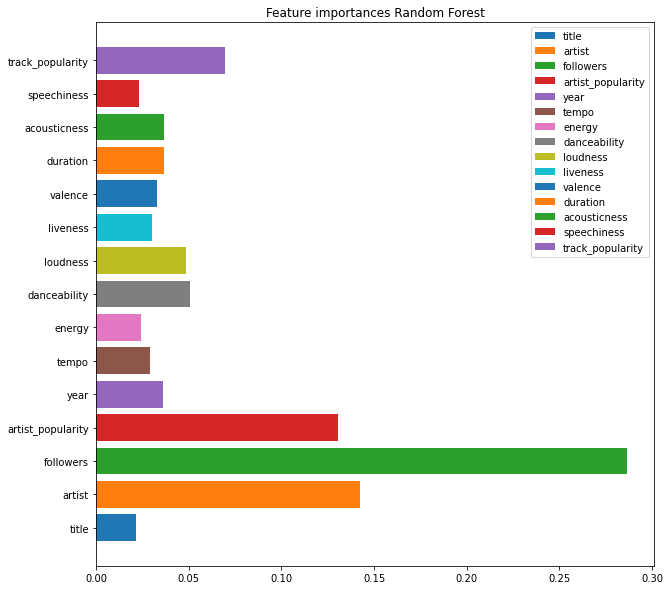

In [ ]:
plt.figure(figsize=(10,10))
for i, feat in enumerate(rf_clf.feature_importances_):
  plt.barh(i+1, feat, label=features.to_list()[i])

plt.yticks(x_plot, features.to_list())
plt.title('Feature importances Random Forest')
plt.legend()
plt.show()

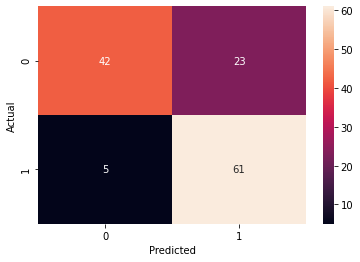

In [ ]:
conf_mat = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_mat, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

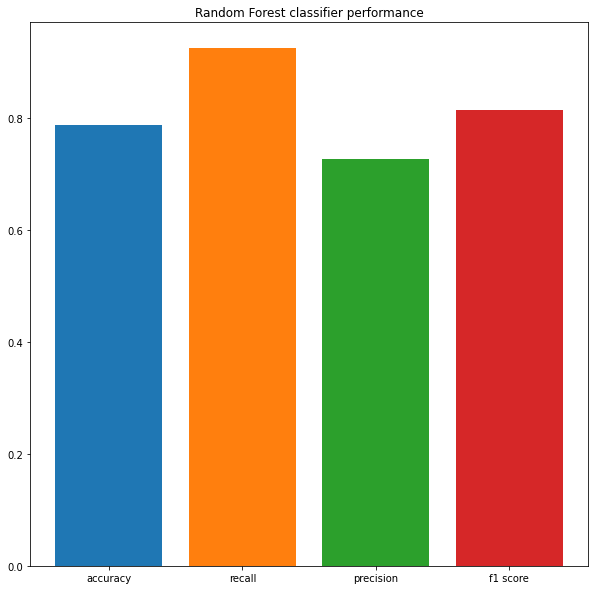

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(1, accuracy)
plt.bar(2, recall)
plt.bar(3, precision)
plt.bar(4, f1)
plt.xticks([1,2,3,4], ['accuracy', 'recall', 'precision', 'f1 score'])
plt.title('Random Forest classifier performance')
plt.show()

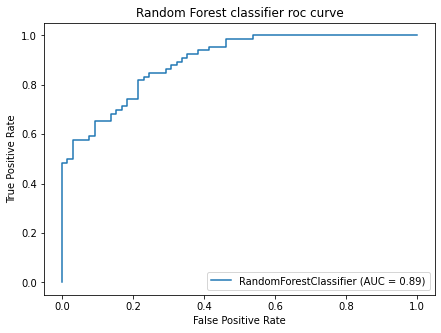

In [ ]:
plt.figure(figsize=(7,5))
plot_roc_curve(rf_clf, X_test, Y_test, ax=plt.gca())
plt.title('Random Forest classifier roc curve')
plt.show()